In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [34]:
%time
df = pd.read_csv('../data/dataset/winequality-red.csv')

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 6.2 µs


In [35]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1475,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,7
990,7.7,0.390,0.12,1.7,0.097,19.0,27.0,0.99596,3.16,0.49,9.400000,5
1142,6.9,0.450,0.11,2.4,0.043,6.0,12.0,0.99354,3.30,0.65,11.400000,6
881,7.6,0.715,0.00,2.1,0.068,30.0,35.0,0.99533,3.48,0.65,11.400000,6
785,9.9,0.350,0.41,2.3,0.083,11.0,61.0,0.99820,3.21,0.50,9.500000,5


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [37]:
y = df['quality']

In [38]:
X = df.drop('quality', axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [40]:
linreg = LinearRegression()

In [41]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
y_pred = linreg.predict(X_test)
mean_squared_error(y_test, y_pred)

0.49083830035637677

In [43]:
y_pred = np.round(linreg.predict(X_test), 0)
mean_squared_error(y_test, y_pred)

0.5643939393939394

In [44]:
residual = y_test - y_pred

In [45]:
residual

678     0.0
1500    0.0
1457    0.0
1079    1.0
909     0.0
1114    0.0
1322   -1.0
346     1.0
1129    0.0
1019   -1.0
389     1.0
497    -1.0
1105   -1.0
742     0.0
325     0.0
753     0.0
1276   -2.0
899    -2.0
515     0.0
1506    1.0
958     1.0
902     1.0
1277    1.0
1491   -1.0
937    -2.0
693     0.0
60      0.0
722    -1.0
336    -1.0
1498    1.0
       ... 
184     1.0
900    -1.0
1243    0.0
726     0.0
1513    0.0
1249    0.0
1540    0.0
254     1.0
449     0.0
383     0.0
861     1.0
351     1.0
1081    1.0
552     0.0
997     1.0
1568    0.0
841     0.0
1211    0.0
1061    1.0
677     0.0
28      0.0
1307   -2.0
1077   -1.0
629     0.0
626     0.0
990    -1.0
1444    0.0
1202    2.0
1291    0.0
500     1.0
Name: quality, Length: 528, dtype: float64

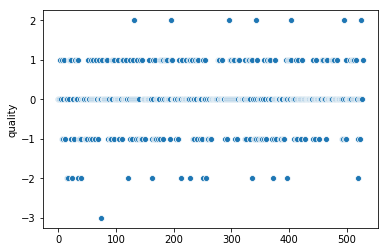

In [32]:
sns.scatterplot(x=range(len(residual)), y=residual)

In [46]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [47]:
np.var(X['volatile acidity'])

0.0320423261333205

In [51]:
for i in X: 
    print(np.var(X[i]))

3.0295205688671114
0.0320423261333205
0.03792375112494089
1.9866539202698996
0.0022137573233114347
109.34645676374501
1081.42563558916
3.5598017926307083e-06
0.023820274241131787
0.02871464701398349
1.1349371714889036


In [73]:
scalar = StandardScaler()

In [74]:
scaled_data = scalar.fit_transform(X)

In [75]:
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)

In [76]:
for i in scaled_data: 
    print(np.var(scaled_data[i]))

1.0000000000000002
1.0000000000000002
1.0
1.0000000000000002
1.0000000000000002
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0


In [77]:
print(scaled_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
5         -0.528360          0.738418    -1.391472       -0.524166  -0.264960   
6         -0.241094          0.403229    -1.083370       -0.666062  -0.392483   
7         -0.585813          0.682553    -1.391472       -0.949853  -0.477498   
8         -0.298547          0.291499    -1.288771       -0.382271  -0.307468   
9         -0.470907         -0.155419     0.457144        2.526589  -0.349975   
10        -0.930531          0.291499    -0.980669       -0.524166   0.202621   
11        -0.470907         

In [78]:
for i in range(len(scaled_data)):
    print(np.var(scaled_data[i]))

KeyError: 0

In [79]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
y = df['quality']
X = df.drop('quality', axis=1)
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.33, random_state=101)
y_pred = linreg.predict(X_test)
mean_squared_error(y_test, y_pred)

0.49083830035637666